<a href="https://colab.research.google.com/github/zenobiapanvelwalla/low-code-book-projects/blob/main/Fraud_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns

In [2]:
url = ("https://storage.googleapis.com/low-code-ai-book/financial_transactions.csv")

In [3]:
transaction_df = pd.read_csv(url)

In [6]:
transaction_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
transaction_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
cols = ['type','nameOrig','nameDest']
transaction_df[cols].describe()

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [8]:
transaction_df['isCorrect'] = (transaction_df['isFraud'] == transaction_df['isFlaggedFraud'])
transaction_df['isCorrect'].sum()

6354423

In [10]:
(transaction_df['isFraud'] * transaction_df['isFlaggedFraud']).sum()

16

<Axes: xlabel='type'>

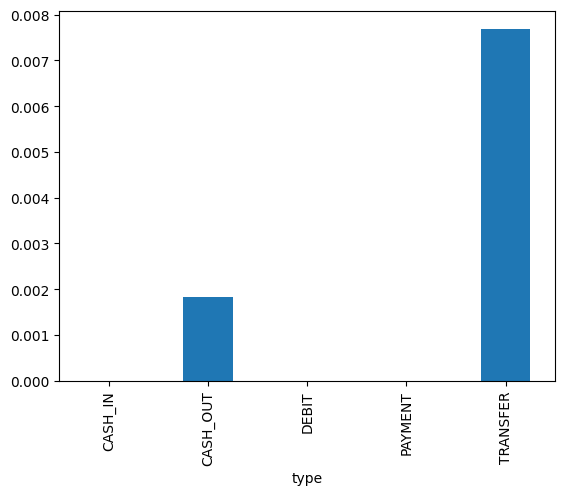

In [11]:
transaction_df.groupby('type')['isFraud'].mean().plot.bar()

In [7]:
transaction_df.groupby('type')['isFraud'].value_counts()

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
Name: count, dtype: int64

<ipython-input-8-463205bf702b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transaction_df.groupby('amountBkts')['isFraud'].mean().plot.bar()


<Axes: xlabel='amountBkts'>

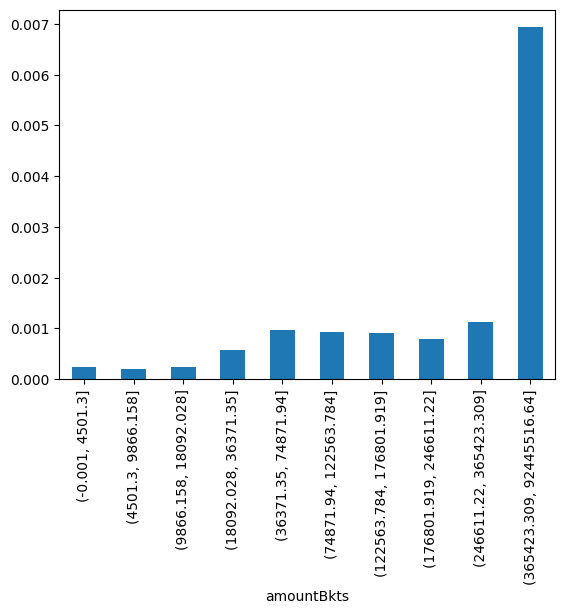

In [8]:
transaction_df['amountBkts'] = pd.qcut(transaction_df['amount'], 10)
transaction_df.groupby('amountBkts')['isFraud'].mean().plot.bar()

<ipython-input-10-842d60654a77>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transaction_df.groupby('oldbalanceOrgBkts')['isFraud'].mean().plot.bar()


<Axes: xlabel='oldbalanceOrgBkts'>

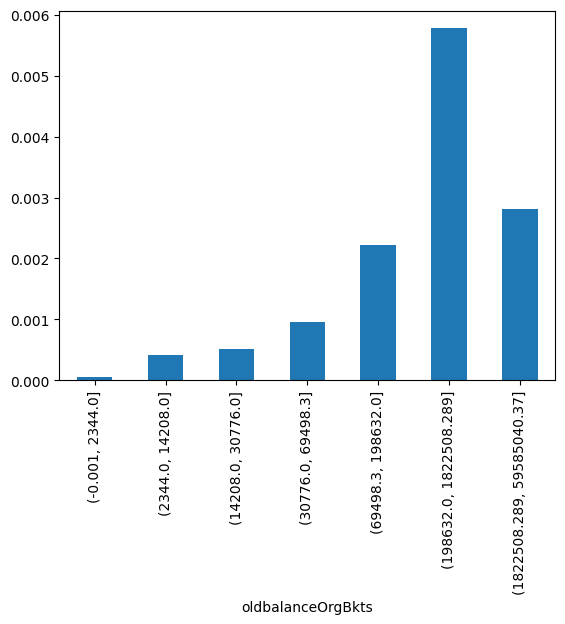

In [10]:
transaction_df['oldbalanceOrgBkts'] = pd.qcut(transaction_df['oldbalanceOrg'], 10, duplicates='drop')
transaction_df.groupby('oldbalanceOrgBkts')['isFraud'].mean().plot.bar()

<Axes: xlabel='oldbalanceDest', ylabel='newbalanceDest'>

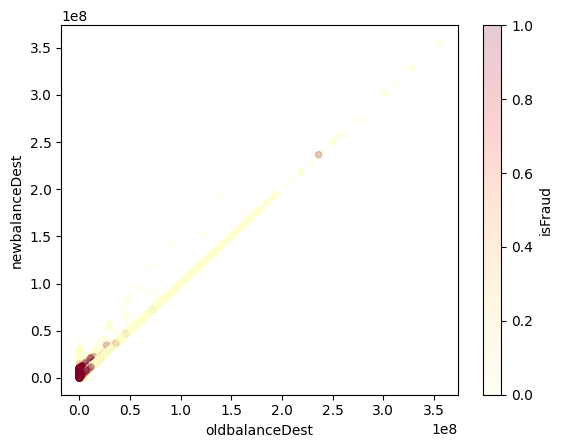

In [10]:
cashout_df = transaction_df.query('type == "CASH_OUT" & newbalanceDest < 1e8')
cashout_df.plot.scatter(x='oldbalanceDest', y='newbalanceDest', c='isFraud', colormap='YlOrRd', alpha=0.1)

<Axes: xlabel='oldbalanceOrg', ylabel='newbalanceOrig'>

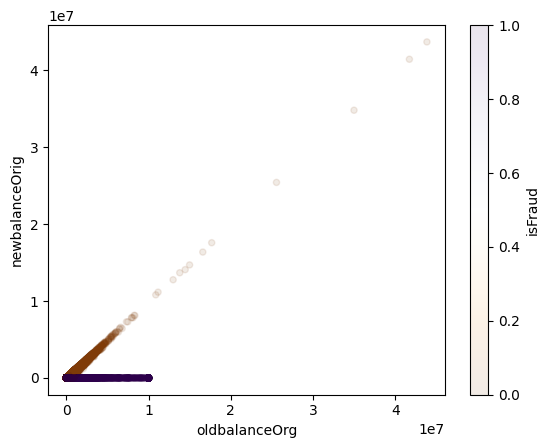

In [14]:
cashout_df = transaction_df.query('type == "CASH_OUT" & oldbalanceOrg < 1e8')
cashout_df.plot.scatter(x='oldbalanceOrg', y='newbalanceOrig', c='isFraud', colormap='PuOr', alpha=0.1)

In [15]:
transaction_df.to_csv('transactions.csv', index=False, encoding='utf-8')

In [16]:
!head transactions.csv

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.0,0,0
1,PAYMENT,4024.36,C1265012928,2671.0,0.0,M1176932104,0.0,0.0,0,0


In [17]:
from google.colab import files
files.download('transactions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>